In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 데이터셋 로드 및 전처리
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 생성
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),  # 추가된 은닉층
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 요약 출력
model.summary()

# 모델 구조 시각화
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               802944    
                                                                 
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                      

Epoch 1/20
1500/1500 [==============================] - 51s 33ms/step - loss: 0.4743 - accuracy: 0.8335 - val_loss: 0.3252 - val_accuracy: 0.8819
Epoch 2/20
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3017 - accuracy: 0.8923 - val_loss: 0.2683 - val_accuracy: 0.8986
Epoch 3/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2540 - accuracy: 0.9077 - val_loss: 0.2580 - val_accuracy: 0.9047
Epoch 4/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2210 - accuracy: 0.9192 - val_loss: 0.2461 - val_accuracy: 0.9114
Epoch 5/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.1942 - accuracy: 0.9278 - val_loss: 0.2439 - val_accuracy: 0.9116
Epoch 6/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.1690 - accuracy: 0.9376 - val_loss: 0.2424 - val_accuracy: 0.9139
Epoch 7/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1490 - accuracy: 0.9444 - val_loss: 0.2681 -

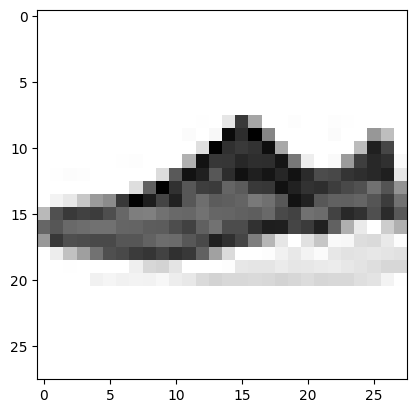

1/1 [==============================] - 0s 140ms/step
[[2.4561426e-26 6.0028618e-30 4.3387665e-23 1.2213307e-20 4.7896188e-25
  2.6380442e-18 2.6694528e-28 1.0000000e+00 3.2817584e-26 3.7962687e-15]]


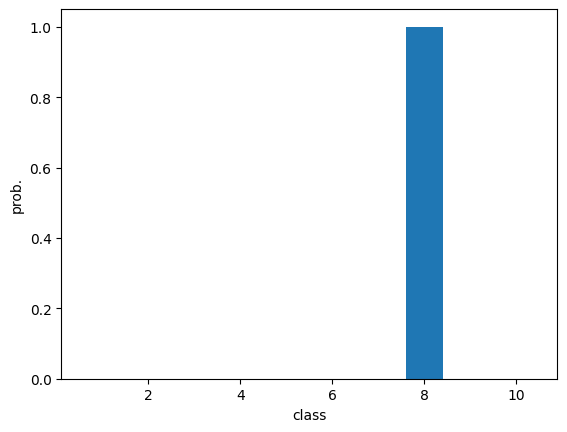

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 로드 및 전처리
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 생성 (변경 코드)
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),  # 추가된 은닉층
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

# 모델 평가 및 예측
model.evaluate(val_scaled, val_target)

# 스니커즈 클래스의 인덱스를 찾기
sneaker_index = np.where(val_target == 7)[0][0]

# 검증 그림 출력 (변경 코드)
plt.imshow(val_scaled[sneaker_index].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[sneaker_index:sneaker_index+1])
print(preds)
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()
